In [6]:
import os

# ----------------------------
# Trie Node Definition
# ----------------------------
class TrieNode:
    def __init__(self):
        self.children = {}
        self.freq = 0
        self.is_end = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.freq += 1
        node.is_end = True

    def find_split_index_frequency(self, word):
        """
        Find split point using frequency ratio.
        - Traverse each character
        - Compute drop in frequency: current_node.freq / previous_node.freq
        - Biggest drop → split point
        """
        node = self.root
        prev_freq = node.freq if node.freq > 0 else 1
        max_drop = 0.0
        split_index = len(word)  # Default: no split

        for i, char in enumerate(word):
            if char not in node.children:
                break
            node = node.children[char]
            if prev_freq > 0:
                drop = (prev_freq - node.freq) / prev_freq  # relative drop
            else:
                drop = 0
            if drop > max_drop:
                max_drop = drop
                split_index = i + 1  # split after this char
            prev_freq = node.freq

        return split_index

# ----------------------------
# Build Prefix and Suffix Tries
# ----------------------------
def build_prefix_trie(words):
    trie = Trie()
    for word in words:
        trie.insert(word)
    return trie

def build_suffix_trie(words):
    trie = Trie()
    for word in words:
        trie.insert(word[::-1])  # reversed for suffix trie
    return trie

# ----------------------------
# Stem words using Frequency Method
# ----------------------------
def stem_words_prefix(words, trie):
    result = {}
    for word in words:
        split_idx = trie.find_split_index_frequency(word)
        stem = word[:split_idx]
        suffix = word[split_idx:] if split_idx < len(word) else ""
        result[word] = (stem, suffix)
    return result

def stem_words_suffix(words, trie):
    result = {}
    for word in words:
        rev_word = word[::-1]
        split_idx = trie.find_split_index_frequency(rev_word)
        suffix = word[len(word) - split_idx:]
        stem = word[:len(word) - split_idx]
        result[word] = (stem, suffix)
    return result

# ----------------------------
# Evaluate using Avg Suffix Length
# ----------------------------
def evaluate(trie_results):
    avg_suffix_len = sum(len(suf) for _, suf in trie_results.values()) / len(trie_results)
    return avg_suffix_len

# ----------------------------
# Save results to file
# ----------------------------
def save_results(filename, results):
    with open(filename, "w", encoding="utf-8") as f:
        for word, (stem, suffix) in results.items():
            f.write(f"{word}={stem}+{suffix}\n")

# ----------------------------
# MAIN
# ----------------------------
if __name__ == "__main__":
    # Load dataset
    file_path = "brown_nouns.txt"
    if not os.path.exists(file_path):
        print(f"File {file_path} not found!")
        exit()

    with open(file_path, "r", encoding="utf-8") as f:
        words = [line.strip().lower() for line in f if line.strip()]

    print(f"Total words loaded: {len(words)}")

    # Build tries
    print("Building prefix trie...")
    prefix_trie = build_prefix_trie(words)
    print("Building suffix trie...")
    suffix_trie = build_suffix_trie(words)

    # Stem words
    print("Stemming with prefix trie (frequency method)...")
    prefix_stems = stem_words_prefix(words, prefix_trie)
    print("Stemming with suffix trie (frequency method)...")
    suffix_stems = stem_words_suffix(words, suffix_trie)

    # Save outputs
    save_results("prefix_stems.txt", prefix_stems)
    save_results("suffix_stems.txt", suffix_stems)

    # Evaluate
    prefix_score = evaluate(prefix_stems)
    suffix_score = evaluate(suffix_stems)

    print("\n--- Sample Output (Prefix Trie) ---")
    for w, (stem, suf) in list(prefix_stems.items())[:10]:
        print(f"{w}={stem}+{suf}")

    print("\n--- Sample Output (Suffix Trie) ---")
    for w, (stem, suf) in list(suffix_stems.items())[:10]:
        print(f"{w}={stem}+{suf}")

    print("\n--- Analysis ---")
    print(f"Average suffix length (Prefix Trie): {prefix_score:.2f}")
    print(f"Average suffix length (Suffix Trie): {suffix_score:.2f}")
    if prefix_score < suffix_score:
        print("Prefix Trie performs better for stemming (frequency-based).")
    else:
        print("Suffix Trie performs better for stemming (frequency-based).")


Total words loaded: 202793
Building prefix trie...
Building suffix trie...
Stemming with prefix trie (frequency method)...
Stemming with suffix trie (frequency method)...

--- Sample Output (Prefix Trie) ---
investigation=inv+estigation
primary=prim+ary
election=el+ection
evidence=ev+idence
irregularities=ir+regularities
place=pl+ace
jury=jur+y
presentments=presentm+ents
charge=ch+arge
praise=pra+ise

--- Sample Output (Suffix Trie) ---
investigation=investi+gation
primary=pri+mary
election=ele+ction
evidence=evi+dence
irregularities=irregula+rities
place=pl+ace
jury=j+ury
presentments=prese+ntments
charge=cha+rge
praise=pr+aise

--- Analysis ---
Average suffix length (Prefix Trie): 4.05
Average suffix length (Suffix Trie): 4.15
Prefix Trie performs better for stemming (frequency-based).


In [ ]:
words = []
with open("tokenized_hi_1_1000.txt", "r", encoding="utf-8") as f:
    for line in f:
        words.append(line.strip())


In [ ]:
from collections import Counter

# Create a Counter object from the words list
word_counts = Counter(words)

# Display the most common words to verify
print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most common words:
के: 115672
में: 88994
की: 70296
,: 63265
को: 54083
से: 51184
ने: 39627
का: 38093
है: 37113
और: 36891


In [ ]:
!apt-get update -qq
!apt-get install fonts-indic -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting templates from packages: 100%
Selecting previously unselected package fonts-deva-extra.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../00-fonts-deva-extra_3.0-5_all.deb ...
Unpacking fonts-deva-extra (3.0-5) ...
Selecting previously unselected package fonts-kalapi.
Preparing to unpack .../01-fonts-kalapi_1.0-4_all.deb ...
Unpacking fonts-kalapi (1.0-4) ...
Selecting previously unselected package fonts-smc-anjalioldlipi.
Preparing to unpack .../02-fonts-smc-anjalioldlipi_7.1.2-2_all.deb ...
Unpacking fonts-smc-anjalioldlipi (7.1.2-2) ...
Selecting previously unselected package fonts-smc-chilanka.
Preparing to unpack .../03-fonts-smc-chilanka_1.540-1_all.deb ...
Unpacking fonts-smc-chilanka (1.540-1) ...
Selecting previously unselected packag

Using font: ['Lohit Devanagari']


/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3066726411.py:38: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

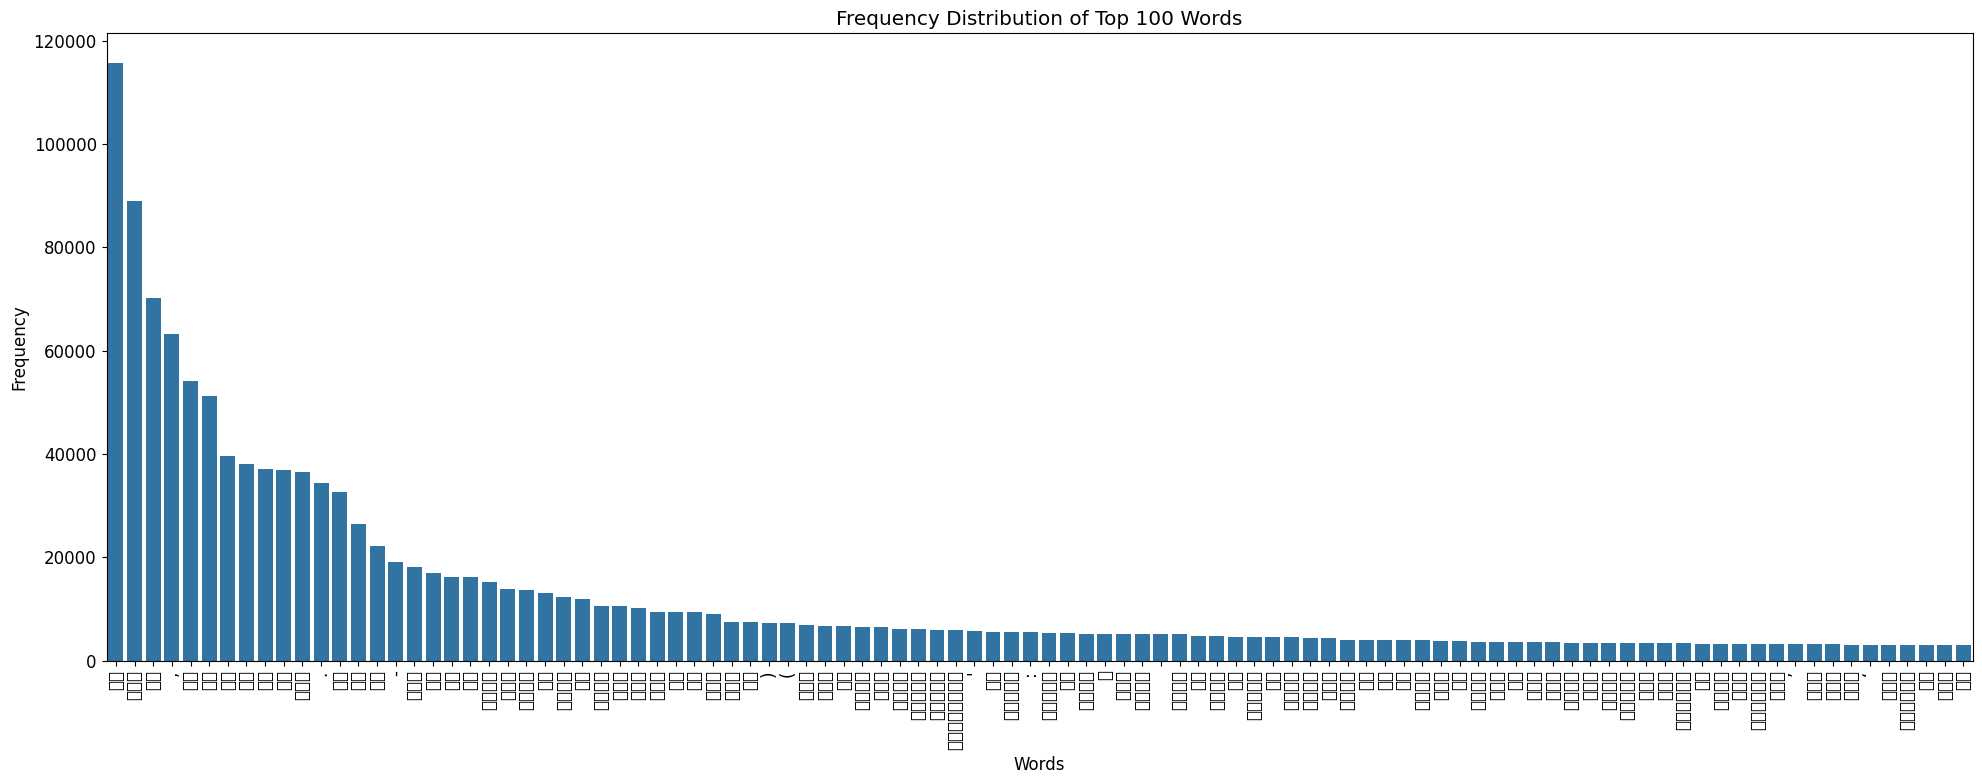

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Get the top 100 most frequent words and their counts
top_100_words = word_counts.most_common(100)
words_list = [word for word, count in top_100_words]
frequencies = [count for word, count in top_100_words]

# Specify the path to a Devanagari font file
# Common locations might include /usr/share/fonts/truetype/ முடிந்தால்
font_path = '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf'

try:
    prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = prop.get_name()
    print(f"Using font: {plt.rcParams['font.family']}")
except FileNotFoundError:
    print(f"Font file not found at {font_path}. Please check the path or install the font.")
    print("Falling back to default font.")
    plt.rcParams['font.family'] = 'DejaVu Sans' # Fallback font

plt.rcParams['font.size'] = 12

# Create a bar plot
plt.figure(figsize=(20, 8)) # Adjust figure size for better readability
sns.barplot(x=words_list, y=frequencies)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title and labels
plt.title("Frequency Distribution of Top 100 Words")
plt.xlabel("Words")
plt.ylabel("Frequency")

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define a list of frequency thresholds
frequency_thresholds = [1000, 5000, 10000]

# Create a list to store filtered word counts
filtered_word_counts_list = []

# For each threshold, filter the word counts
for threshold in frequency_thresholds:
    filtered_counts = {word: count for word, count in word_counts.items() if count <= threshold}
    filtered_word_counts_list.append((threshold, filtered_counts))

# Display the number of words remaining after filtering for each threshold
for threshold, filtered_counts in filtered_word_counts_list:
    print(f"Words remaining after removing words with frequency > {threshold}: {len(filtered_counts)}")

Words remaining after removing words with frequency > 1000: 101915
Words remaining after removing words with frequency > 5000: 102204
Words remaining after removing words with frequency > 10000: 102233


Using font: Lohit Devanagari (found at /usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf)


/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp

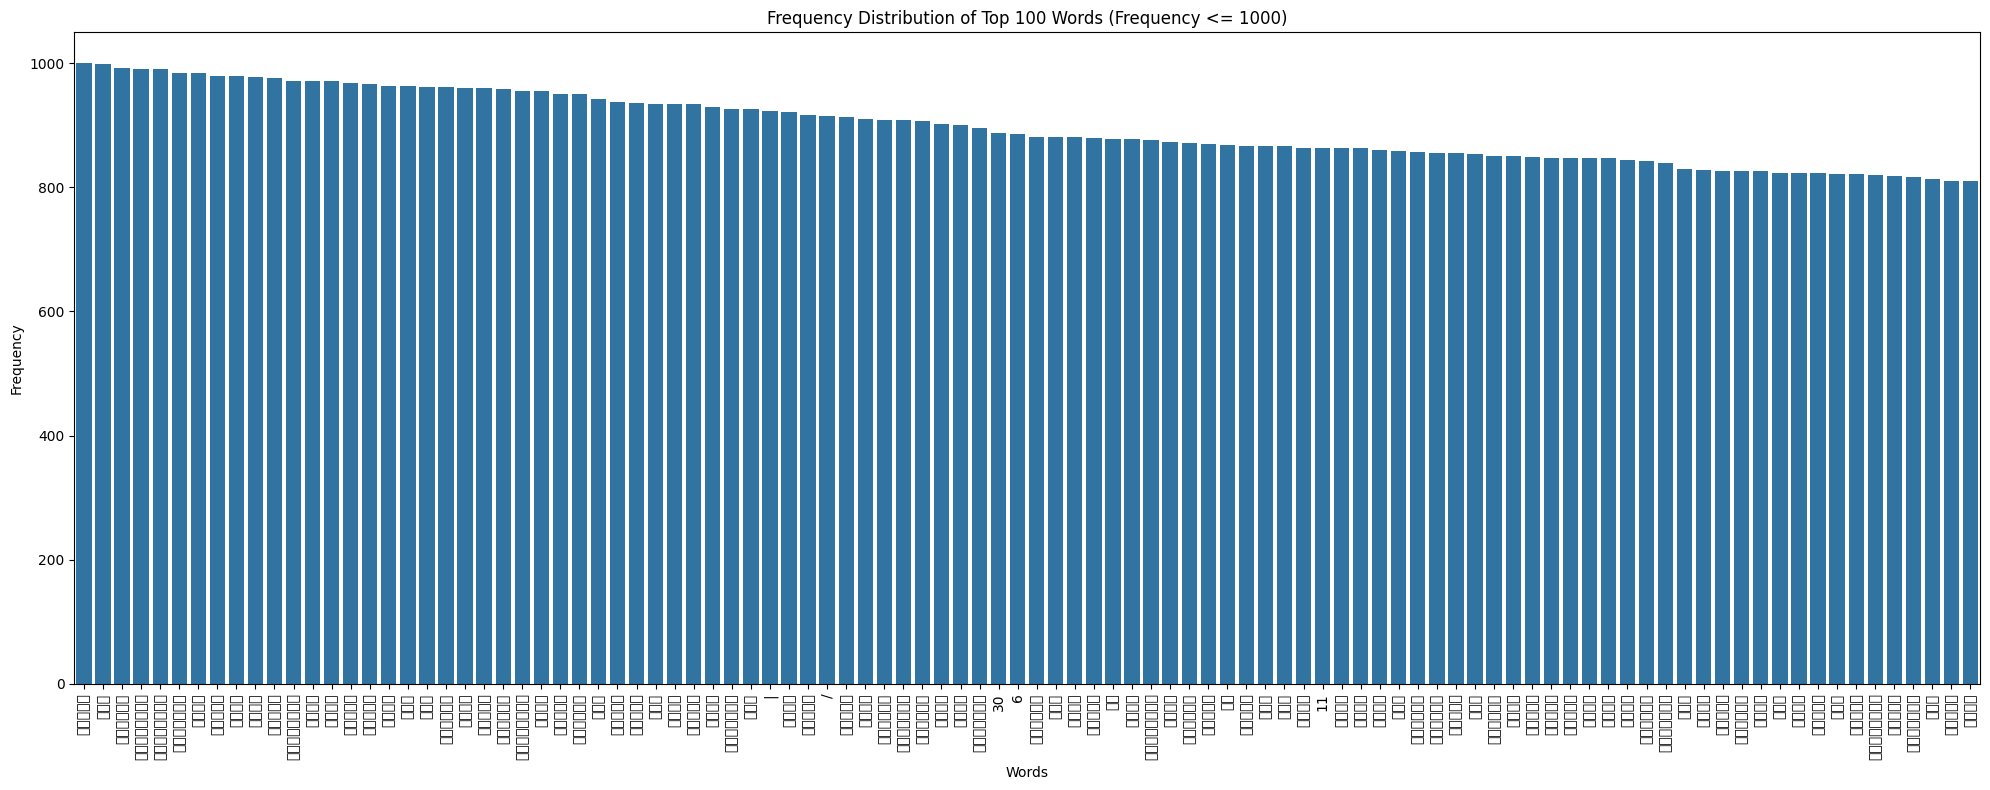

/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/

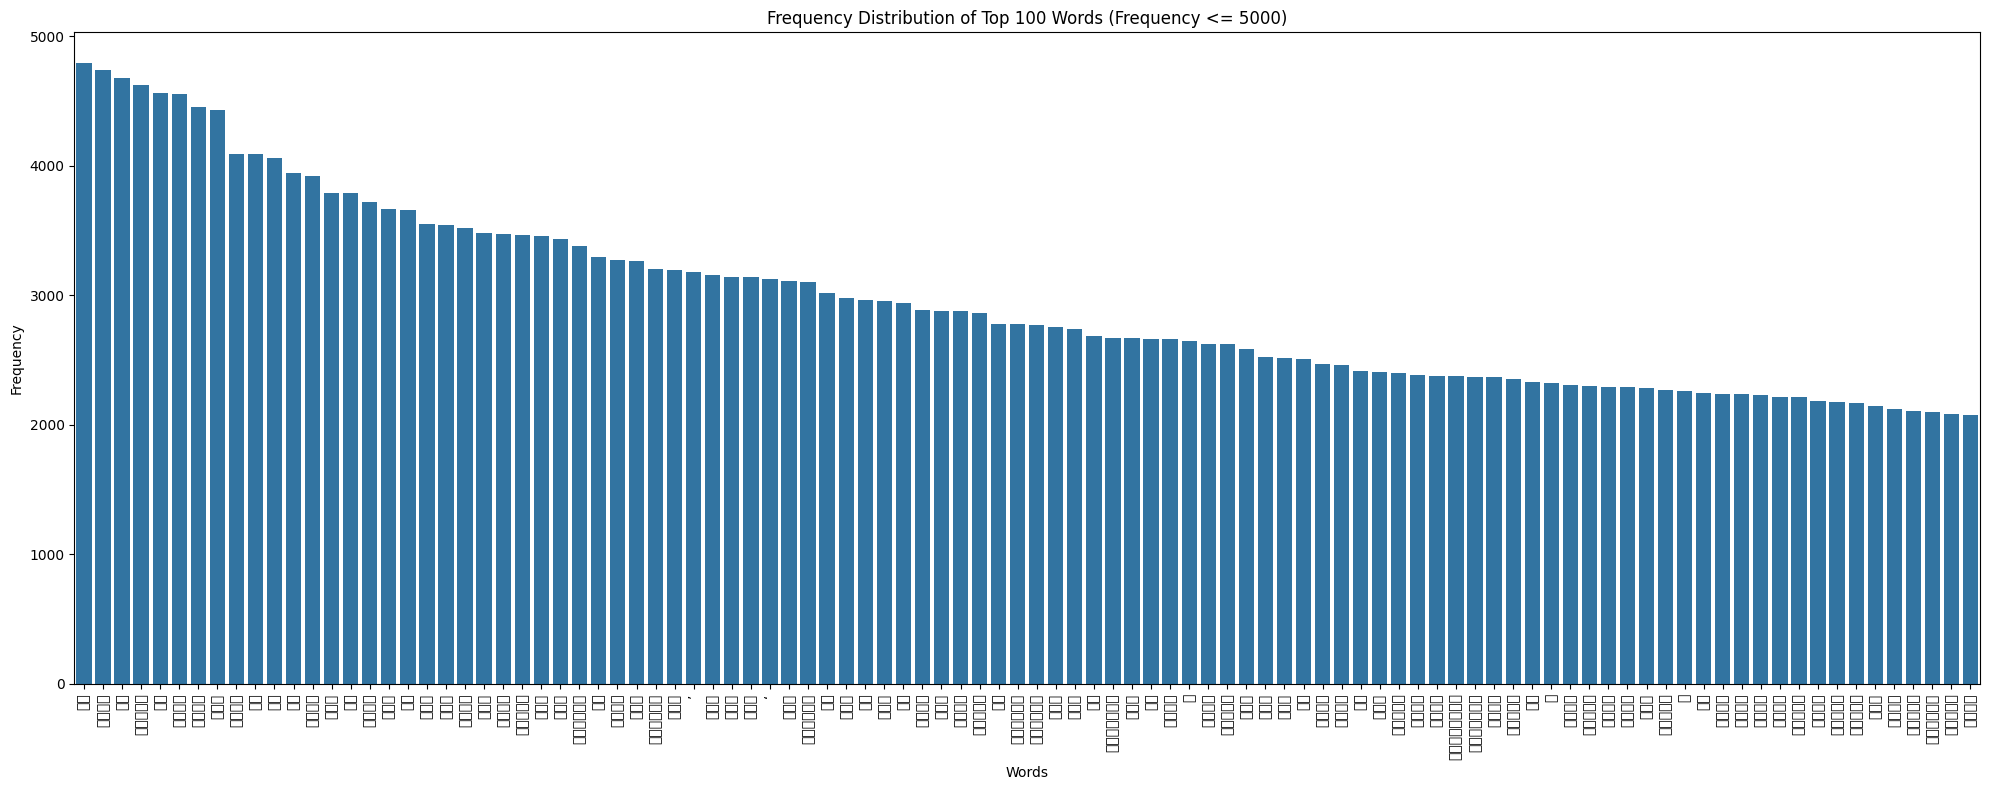

/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2000592692.py:68: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

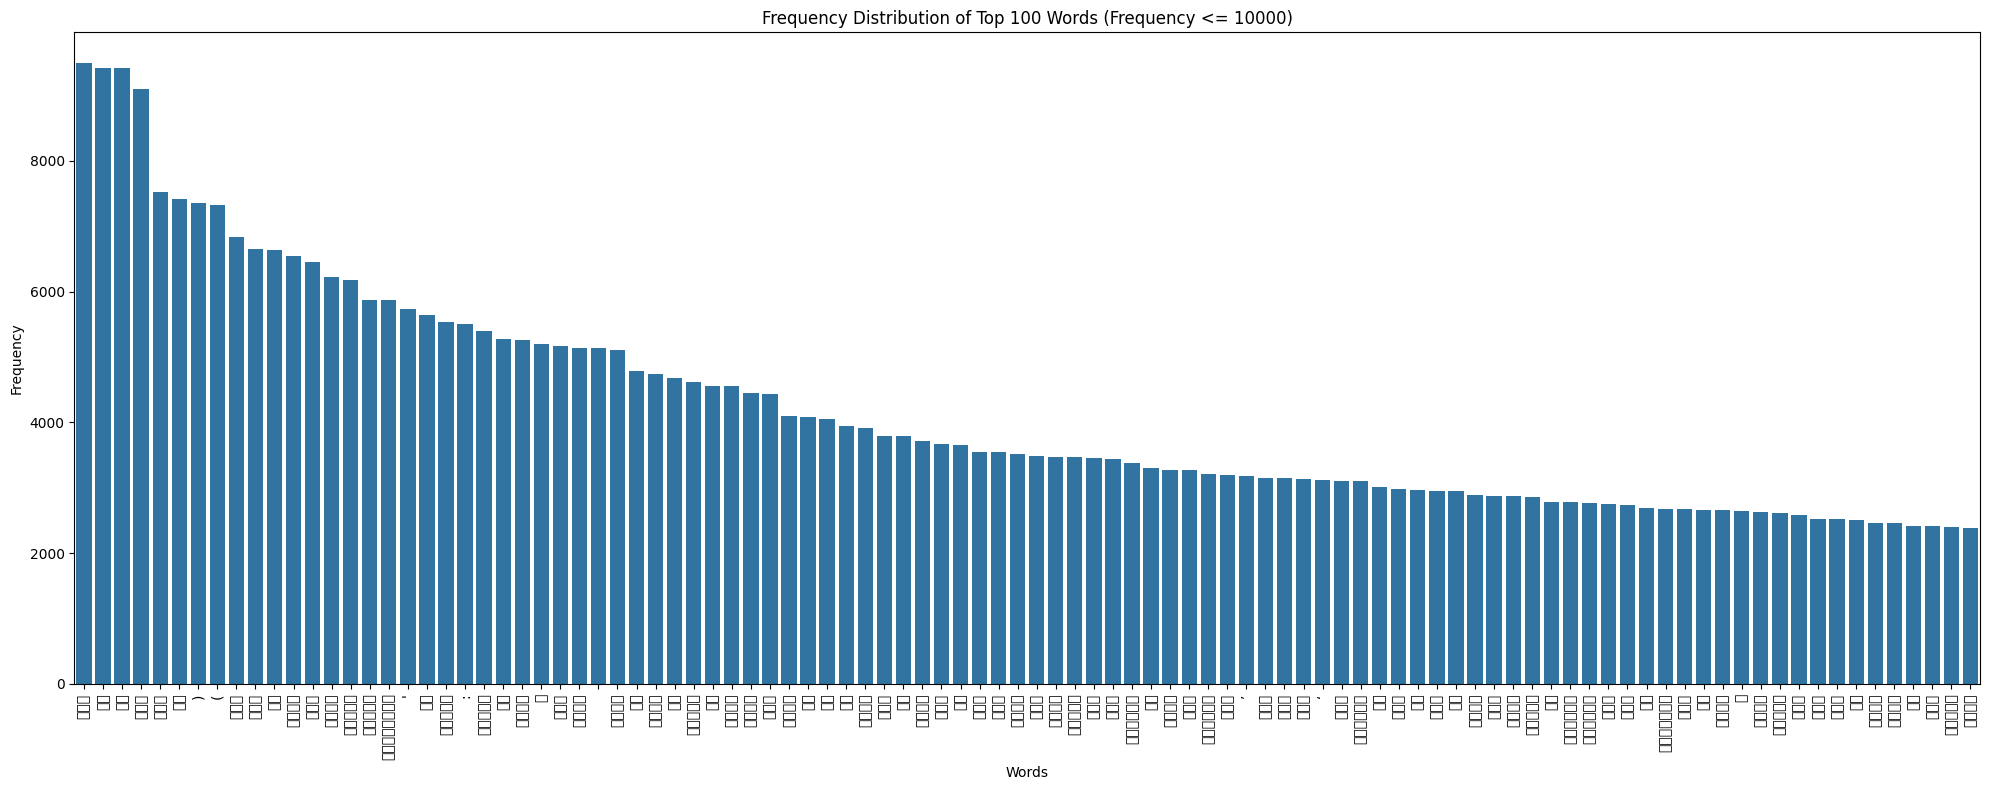

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Attempt to find and set a suitable Devanagari font
font_name = 'Lohit Devanagari'
found_font = fm.findfont(font_name, rebuild_if_missing=True)

if found_font:
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name]
    print(f"Using font: {font_name} (found at {found_font})")
else:
    print(f"Font '{font_name}' not found. Trying other common font paths.")
    # Try some common alternative paths if the first attempt fails
    common_paths = [
        '/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf',
        '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf',
        '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf' # A common fallback, might not support Devanagari
    ]
    set_font = False
    for path in common_paths:
        try:
            prop = fm.FontProperties(fname=path)
            plt.rcParams['font.family'] = prop.get_name()
            print(f"Using font from path: {plt.rcParams['font.family']}")
            set_font = True
            break
        except FileNotFoundError:
            print(f"Font file not found at {path}.")

    if not set_font:
        print("No suitable Devanagari font found. Plots may not display correctly.")
        plt.rcParams['font.family'] = 'DejaVu Sans' # Fallback

plt.rcParams['font.size'] = 10

# Iterate through the filtered word counts list
for threshold, filtered_counts in filtered_word_counts_list:
    # Get the top N most frequent words and their counts after filtering
    top_n = 100 # You can adjust N as needed
    # Ensure we handle cases where there are fewer than top_n words after filtering
    if len(filtered_counts) < top_n:
        print(f"Warning: Only {len(filtered_counts)} words available for threshold {threshold}.")
        top_n = len(filtered_counts)

    if top_n == 0:
        print(f"No words remaining for threshold {threshold}. Skipping plot.")
        continue

    top_filtered_words = Counter(filtered_counts).most_common(top_n)
    words_list = [word for word, count in top_filtered_words]
    frequencies = [count for word, count in top_filtered_words]

    # Create a bar plot
    plt.figure(figsize=(20, 8)) # Adjust figure size for better readability
    sns.barplot(x=words_list, y=frequencies)

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Add title and labels
    plt.title(f"Frequency Distribution of Top {top_n} Words (Frequency <= {threshold})")
    plt.xlabel("Words")
    plt.ylabel("Frequency")

    # Display the plot
    plt.tight_layout()
    plt.show()